# Training Material: Change detection of the port operation in the COVID-19 crisis

## Module 1: Visualizing the sample observations for pre-crisis, in-crisis, and post-crisis

This training material guides you through visualizing preprocessed ALOS-2 SAR images using Python.

### 1.1. Reading and Visualizing ALOS-2 Data

#### 1.1.1. Setting up the Environment

In [1]:
pip install rasterio matplotlib gdal numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### 1.1.2 Loading preprocessed ALOS-2 Data and Visualizing the sample observations

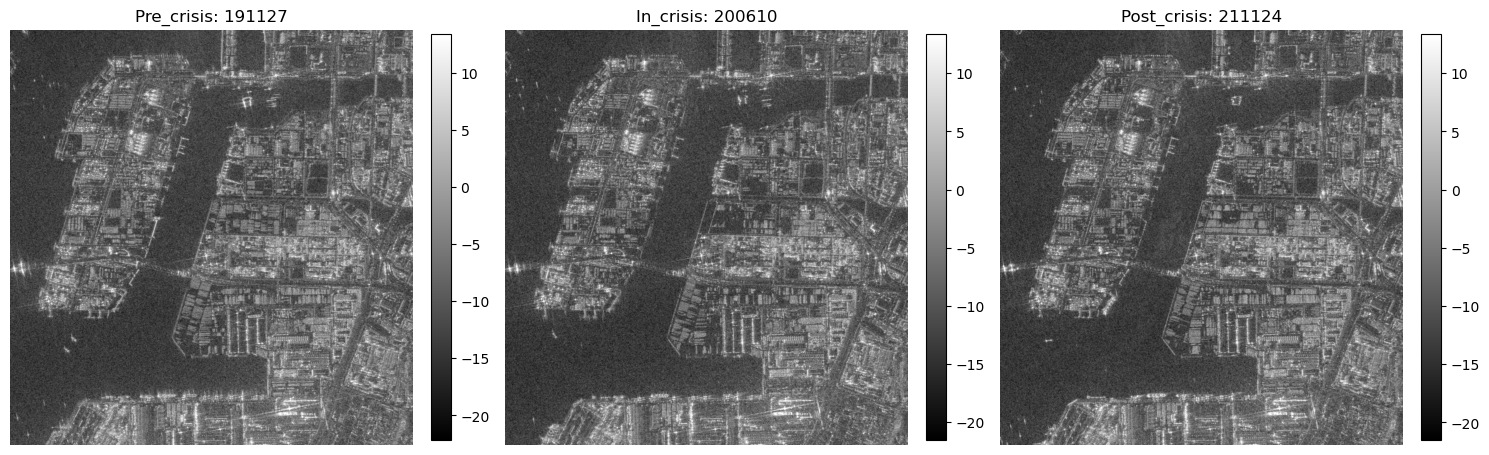

In [2]:
import matplotlib.pyplot as plt
import rasterio

# Specify individual image paths
image_paths = [
    "/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-191127_preprocessed.tif",
    "/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-200610_preprocessed.tif",
    "/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-211124_preprocessed.tif"
]

# Titles for each image
titles = ["Pre_crisis: 191127", "In_crisis: 200610", "Post_crisis: 211124"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the images and plot them
for idx, (image_path, title) in enumerate(zip(image_paths, titles)):
    with rasterio.open(image_path) as src:
        # Read the first band of the image
        image_data = src.read(1)
        
        # Display the image in the corresponding subplot
        im = axes[idx].imshow(image_data, cmap='gray')
        axes[idx].set_title(title)
        axes[idx].axis("off")
        
        # Add a color bar for each subplot
        fig.colorbar(im, ax=axes[idx], orientation='vertical', fraction=0.046, pad=0.04)

# Adjust layout to ensure titles and color bars fit nicely
plt.tight_layout()
plt.show()


## Module 2: ALOS-2 Change Detection and Classification

Calculate change detection using the difference between two ALOS-2 images and classify the change into three classes using the normal distribution.

### 2.1 Introduction to ALOS-2 Data and Change Detection

* ALOS-2 (Advanced Land Observing Satellite-2) is a Japanese satellite carrying the PALSAR-2 (Phased Array type L-band Synthetic Aperture Radar) sensor. It's used for various applications like forest monitoring, disaster management, and land use mapping.
* Change detection with SAR involves comparing images from different times to identify changes on the Earth's surface. SAR's sensitivity to surface roughness and structure makes it suitable for detecting changes like deforestation, flooding, or urban development.
* Preprocessing is essential for accurate change detection. **Radiometric calibration** converts digital numbers to physical values (backscatter), correcting for sensor biases. **Speckle filtering** reduces noise inherent in SAR data. **Terrain correction** removes geometric distortions caused by terrain variations, ensuring accurate spatial alignment of images.

### 2.2 Calculation of the difference between two periods (Pre_crisis and In_crisis)

In [3]:
!pip install rasterio matplotlib gdal geopandas numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


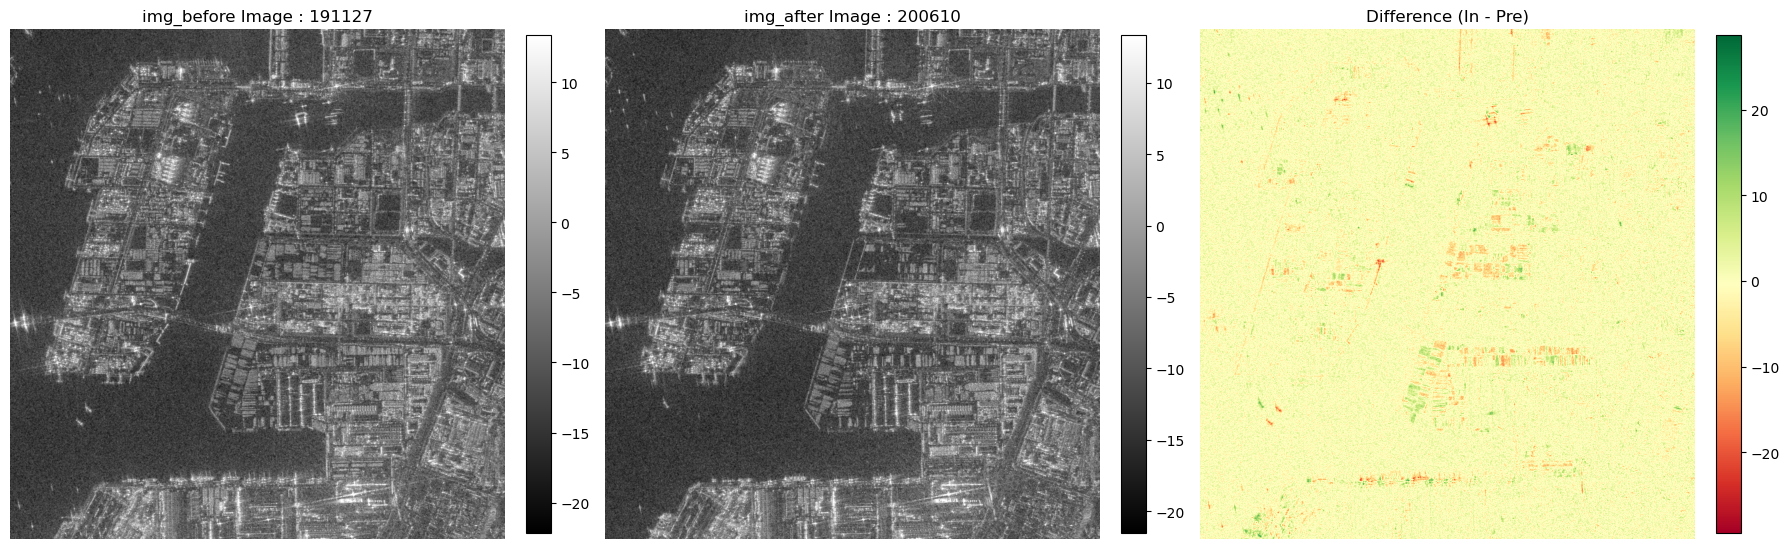

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the first ALOS-2 image (before change)
with rasterio.open('/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-191127_preprocessed.tif') as src_before:
    img_before = src_before.read(1)

# Load the second ALOS-2 image (after change)
with rasterio.open('/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-200610_preprocessed.tif') as src_after:
    img_after = src_after.read(1)

# Calculate the difference
difference = img_after - img_before

# Set up the figure for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot img_before Image with color bar
im1 = axes[0].imshow(img_before, cmap='gray')
axes[0].set_title("img_before Image : 191127")
axes[0].axis("off")
fig.colorbar(im1, ax=axes[0], orientation='vertical', fraction=0.046, pad=0.04)

# Plot img_after Image with color bar
im2 = axes[1].imshow(img_after, cmap='gray')
axes[1].set_title("img_after Image : 200610")
axes[1].axis("off")
fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)

# Plot Difference Image with color bar
im3 = axes[2].imshow(difference, cmap='RdYlGn')
axes[2].set_title("Difference (In - Pre)")
axes[2].axis("off")
fig.colorbar(im3, ax=axes[2], orientation='vertical', fraction=0.046, pad=0.04)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### 2.2.1. Compute the Mean and Standard Deviation

In [8]:

# Assuming the following variables are defined:
# pre_crisis_data, in_crisis_data

# Calculate mean, median, and standard deviation for case A
mean_diff = np.mean(difference)
median_diff = np.median(difference)
std_diff = np.std(difference)


#### 2.2.2. Classification using Normal Distribution

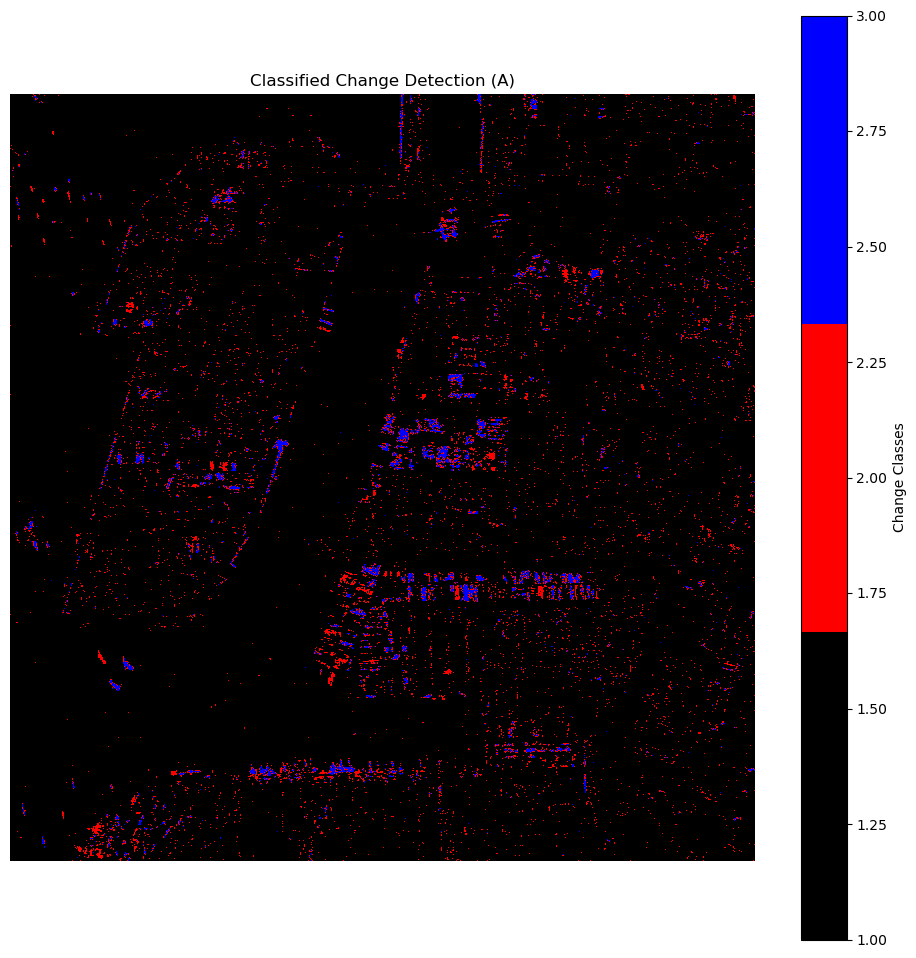

In [9]:
classified_image = np.zeros_like(difference)  # Initialize classification array

# Class 1: No Change (within one standard deviation of the mean)
classified_image[(difference >= mean_diff - 2 * std_diff) & 
                       (difference <= mean_diff + 2 * std_diff)] = 1  

# Class 2: Positive Change (greater than one standard deviation above the mean)
classified_image[difference > mean_diff + 2 * std_diff] = 2  

# Class 3: Negative Change (greater than one standard deviation below the mean)
classified_image[difference < mean_diff - 2 * std_diff] = 3

# Display the classified image
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

figure(figsize=(12,12))

plt.imshow(classified_image, cmap=ListedColormap(['black', 'red', 'blue']))
plt.colorbar(label="Change Classes")
plt.title("Classified Change Detection (A)")
plt.axis("off")
plt.show()


### 2.3 Calculation of the difference between two periods (In_crisis and Post_crisis)

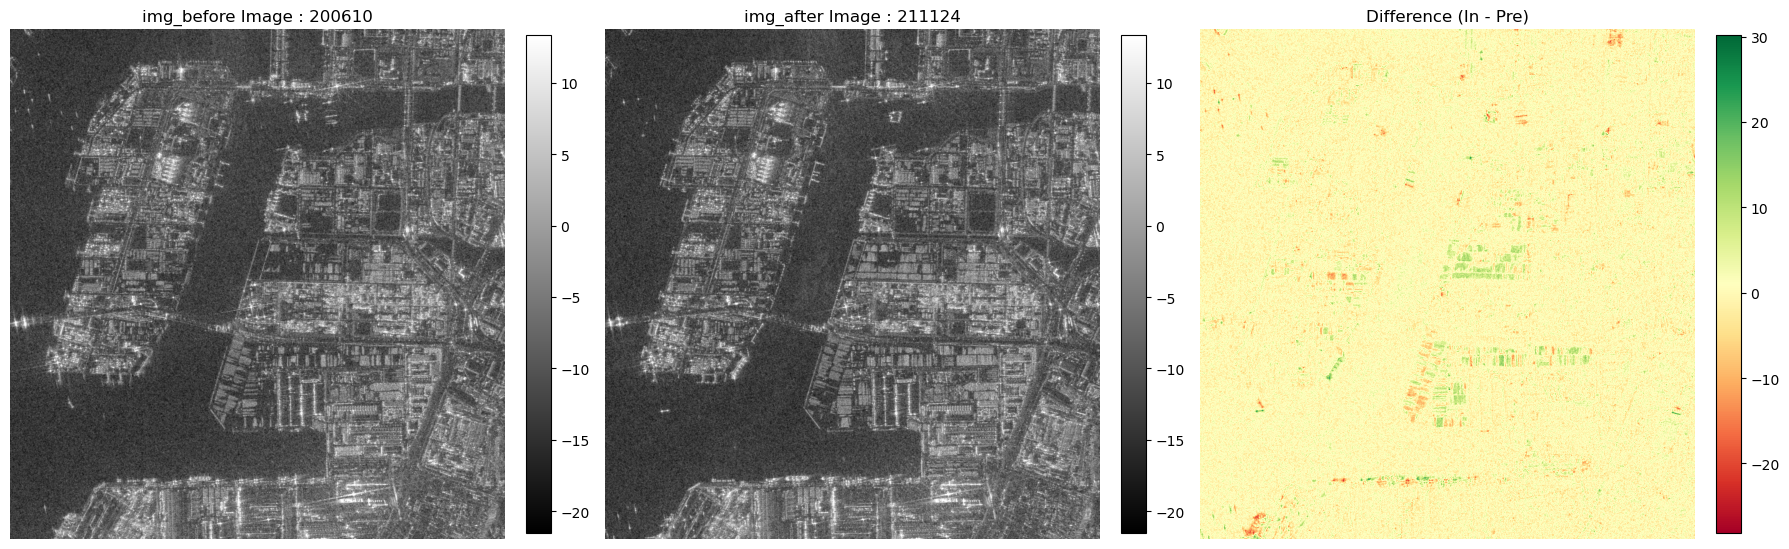

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the first ALOS-2 image (before change)
with rasterio.open('/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-200610_preprocessed.tif') as src_before:
    img_before = src_before.read(1)

# Load the second ALOS-2 image (after change)
with rasterio.open('/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-211124_preprocessed.tif') as src_after:
    img_after = src_after.read(1)

# Calculate the difference
difference = img_after - img_before

# Set up the figure for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot img_before Image with color bar
im1 = axes[0].imshow(img_before, cmap='gray')
axes[0].set_title("img_before Image : 200610")
axes[0].axis("off")
fig.colorbar(im1, ax=axes[0], orientation='vertical', fraction=0.046, pad=0.04)

# Plot img_after Image with color bar
im2 = axes[1].imshow(img_after, cmap='gray')
axes[1].set_title("img_after Image : 211124")
axes[1].axis("off")
fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)

# Plot Difference Image with color bar
im3 = axes[2].imshow(difference, cmap='RdYlGn')
axes[2].set_title("Difference (In - Pre)")
axes[2].axis("off")
fig.colorbar(im3, ax=axes[2], orientation='vertical', fraction=0.046, pad=0.04)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### 2.3.1. Compute the Mean and Standard Deviation

In [8]:

# Assuming the following variables are defined:
# pre_crisis_data, in_crisis_data

# Calculate mean, median, and standard deviation for case A
mean_diff = np.mean(difference)
median_diff = np.median(difference)
std_diff = np.std(difference)


#### 2.3.2. Classification using Normal Distribution

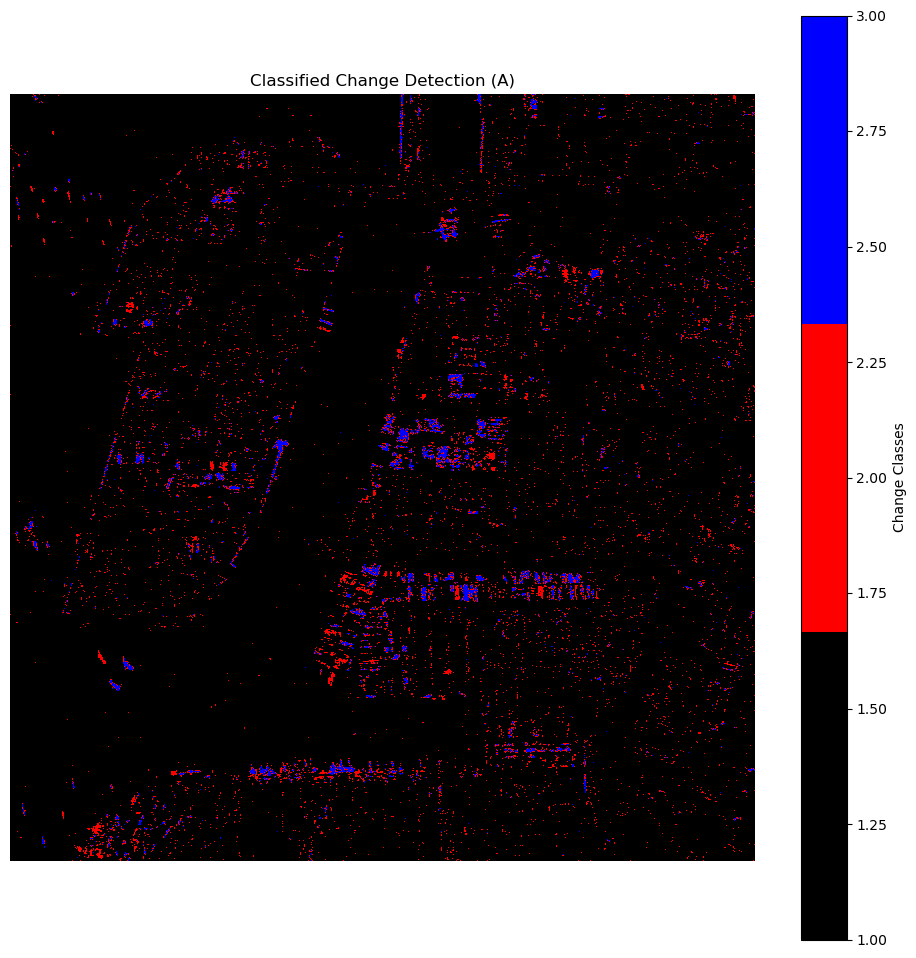

In [9]:
classified_image = np.zeros_like(difference)  # Initialize classification array

# Class 1: No Change (within one standard deviation of the mean)
classified_image[(difference >= mean_diff - 2 * std_diff) & 
                       (difference <= mean_diff + 2 * std_diff)] = 1  

# Class 2: Positive Change (greater than one standard deviation above the mean)
classified_image[difference > mean_diff + 2 * std_diff] = 2  

# Class 3: Negative Change (greater than one standard deviation below the mean)
classified_image[difference < mean_diff - 2 * std_diff] = 3

# Display the classified image
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

figure(figsize=(12,12))

plt.imshow(classified_image, cmap=ListedColormap(['black', 'red', 'blue']))
plt.colorbar(label="Change Classes")
plt.title("Classified Change Detection (A)")
plt.axis("off")
plt.show()
